# Transform the targets to the Yolo Format

This notebook helps to understand how the data are prepared for Yolo using a test dataset.

In [1]:
import sys
if '..' not in sys.path:
    sys.path.append('..')

from tfyolo3.utils import image_utils, data_utils
from tfyolo3.datasets import YoloDataset, preprocessing
from pathlib import Path
import numpy as np
import tensorflow as tf
import math
import matplotlib.pyplot as plt

import imgaug as ia
from imgaug import augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
import pandas as pd

The classes contained in the dataset

In [4]:
categories_path = Path('../datasets/car_dataset/classes.names')
categories = data_utils.load_classes(categories_path, True)

list(categories.items())[:10]

[(0, 'book'),
 (1, 'bus'),
 (2, 'car'),
 (3, 'motorcycle'),
 (4, 'vehicle registration plate')]

Resize the dataset

In [5]:
path = Path('../datasets/car_dataset/manifest.txt')
# path = Path('/Users/fumarolaf/git/claims_estimator/scripts/my_history_car/dataset/manifest.txt')

In [7]:
lines = path.read_text().strip().split('\n')
len(lines)

18

Define the target shape, the max boxes per image, batch size for the dataset generator

In [8]:
base_path = path.parent
target_shape = (512, 512)
max_boxes_per_image = 10
batch_size = 1
num_classes = len(categories.keys())

Load a batch the annotations and resize images and annotations to the target shape

In [15]:
images_path = base_path / 'images'
annotations_path = base_path / 'annotations'

def parse(image_name):
    """Return the pair image_path, annotations_box_class
    """
    image_path = images_path / image_name

    annotation_name = image_name.split('.')[0] + '.txt'
    annotation_path = annotations_path / annotation_name
    box_class = pd.read_csv(annotation_path,header=None).values

    return image_path, box_class

In [16]:
images_boxes = [parse(image_name) for image_name in lines[:10]]

[[  0.   0. 512. 255.   2.]]


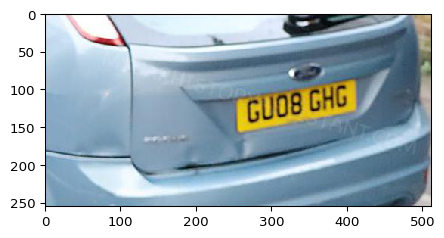

[[  8.15936279   0.         523.21911621 277.41833496   2.        ]]


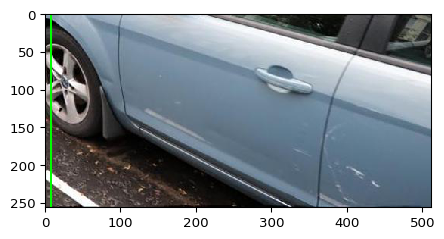

[[  6.11952209   0.         528.31872559 522.19921875   2.        ]]


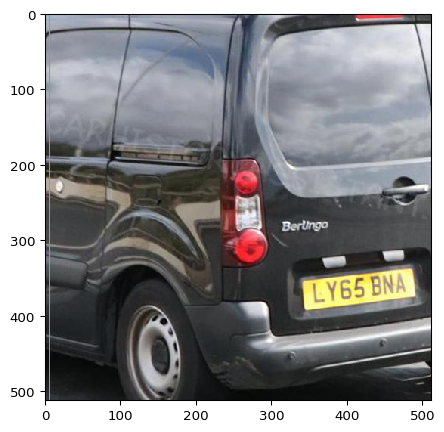

[[  0.         105.05179596 525.25897217 512.           2.        ]]


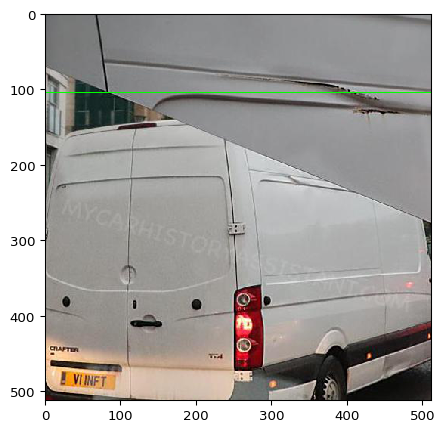

[[  8.15936279  47.93625641 490.58166504 508.94024658   2.        ]]


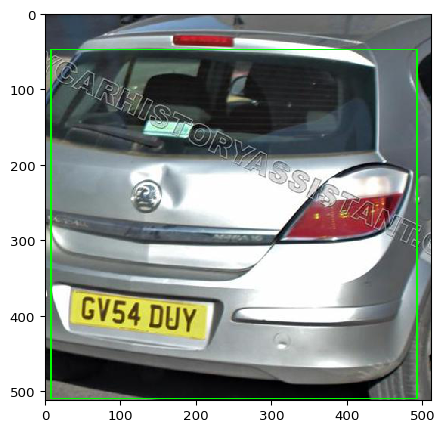

[[  0.   0. 512. 512.   2.]]


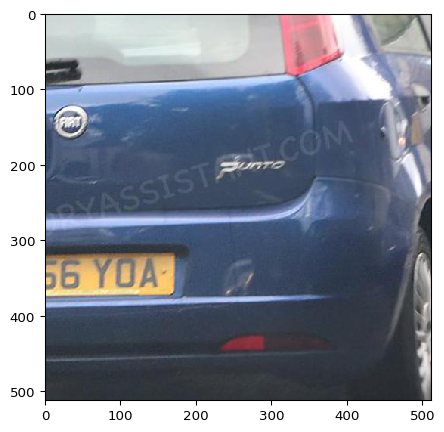

[[ 15.29880524   3.05976105 510.98007202 527.29882812   2.        ]]


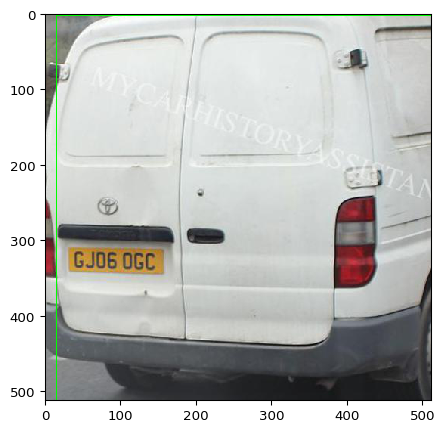

[[  6.11952209   7.13953495 522.19921875 295.7807312    2.        ]]


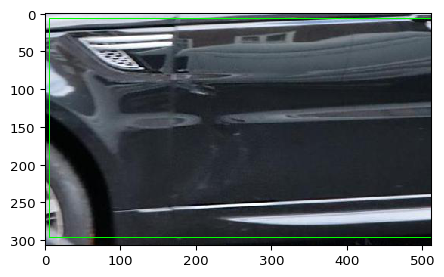

[[321.27490234   0.         510.98007202 213.17999268   2.        ]
 [ 23.45816803  15.30000019 386.54980469 194.81999207   2.        ]]


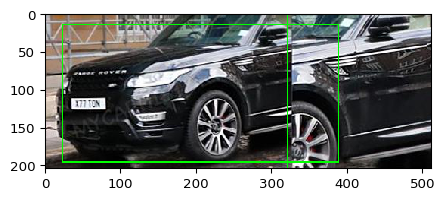

[[  0.   0. 512. 256.   2.]]


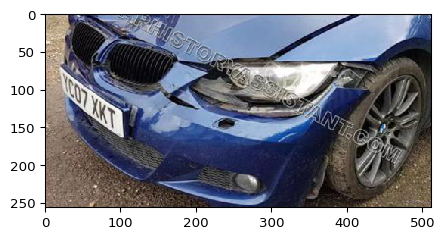

In [17]:
for image in images_boxes:
    img_path, boxes = image

    img = preprocessing.open_image(img_path)
    img, boxes = preprocessing.resize(img, boxes, target_shape)
    
    print(boxes)
        
    boxes_transformed = BoundingBoxesOnImage([BoundingBox(x[0], x[1], x[2], x[3]) for x in boxes], 
            shape=img.shape)
    ia.imshow(boxes_transformed.draw_on_image(img, size=2))

## Conclusion

This show how the data are encoded by Yolo. These methods are wrapped into a [tf.keras.utils.Sequence](https://www.tensorflow.org/api_docs/python/tf/keras/utils/Sequence).